In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
#LOADİNG DATASET
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked Weight', 'Viscera weight', 'shell weight', 'Rings']
abalone_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None, names=column_names)

In [ ]:
type(abalone_data)

pandas.core.frame.DataFrame

In [ ]:
abalone_data.shape

(4177, 9)

In [ ]:
abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


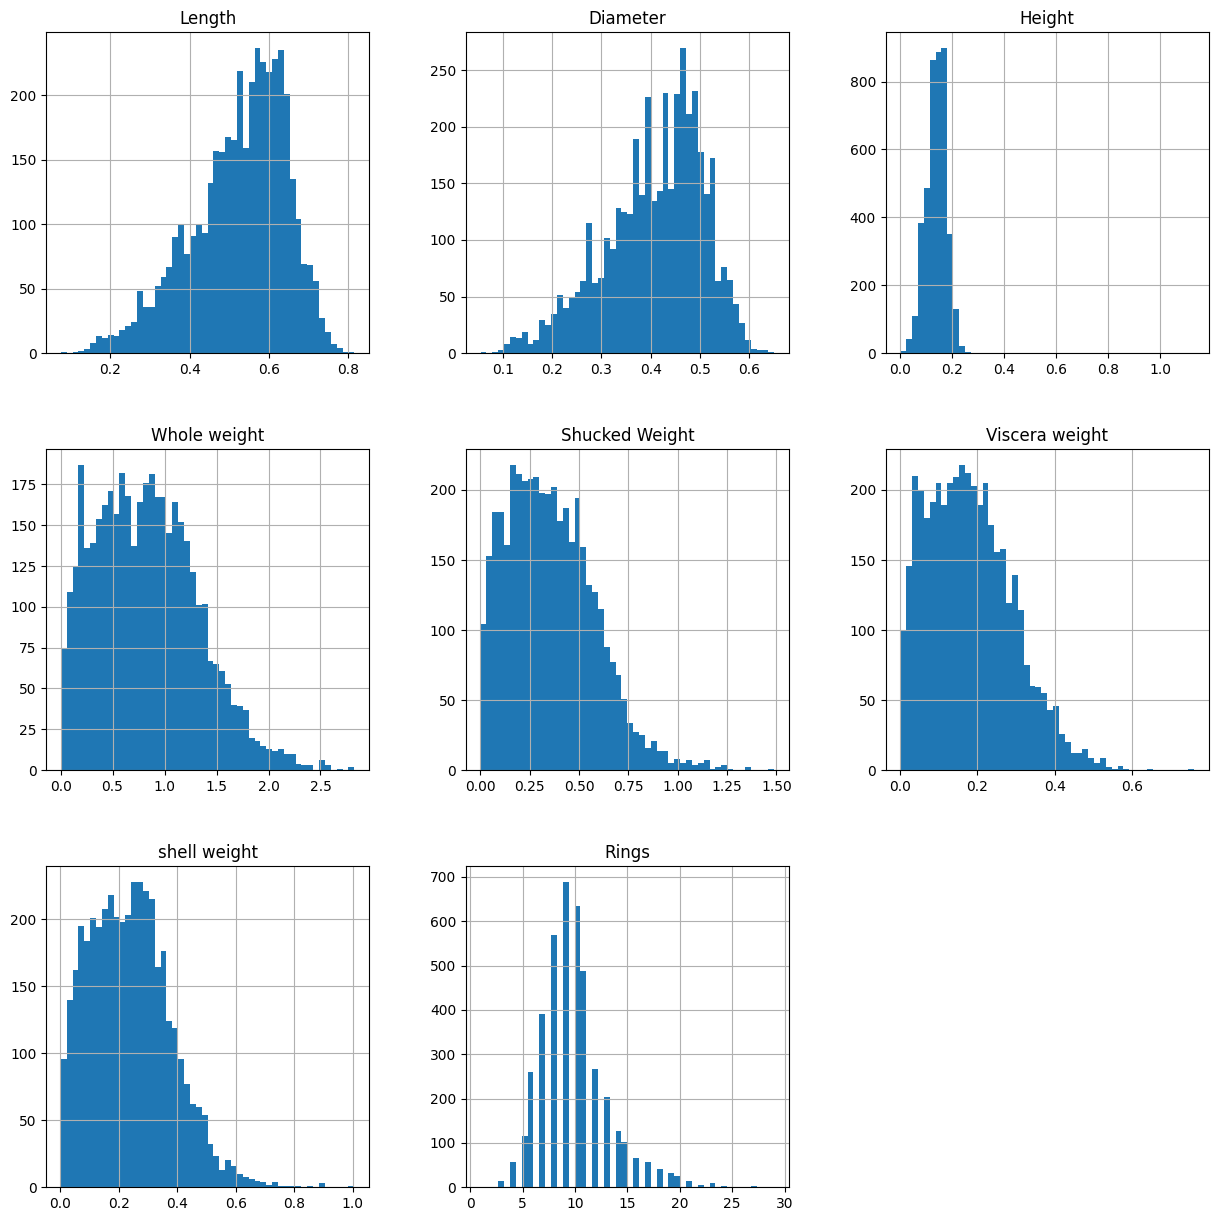

In [ ]:
abalone_data.hist(bins=50, figsize=(15,15))
plt.show()

<Figure size 640x480 with 0 Axes>

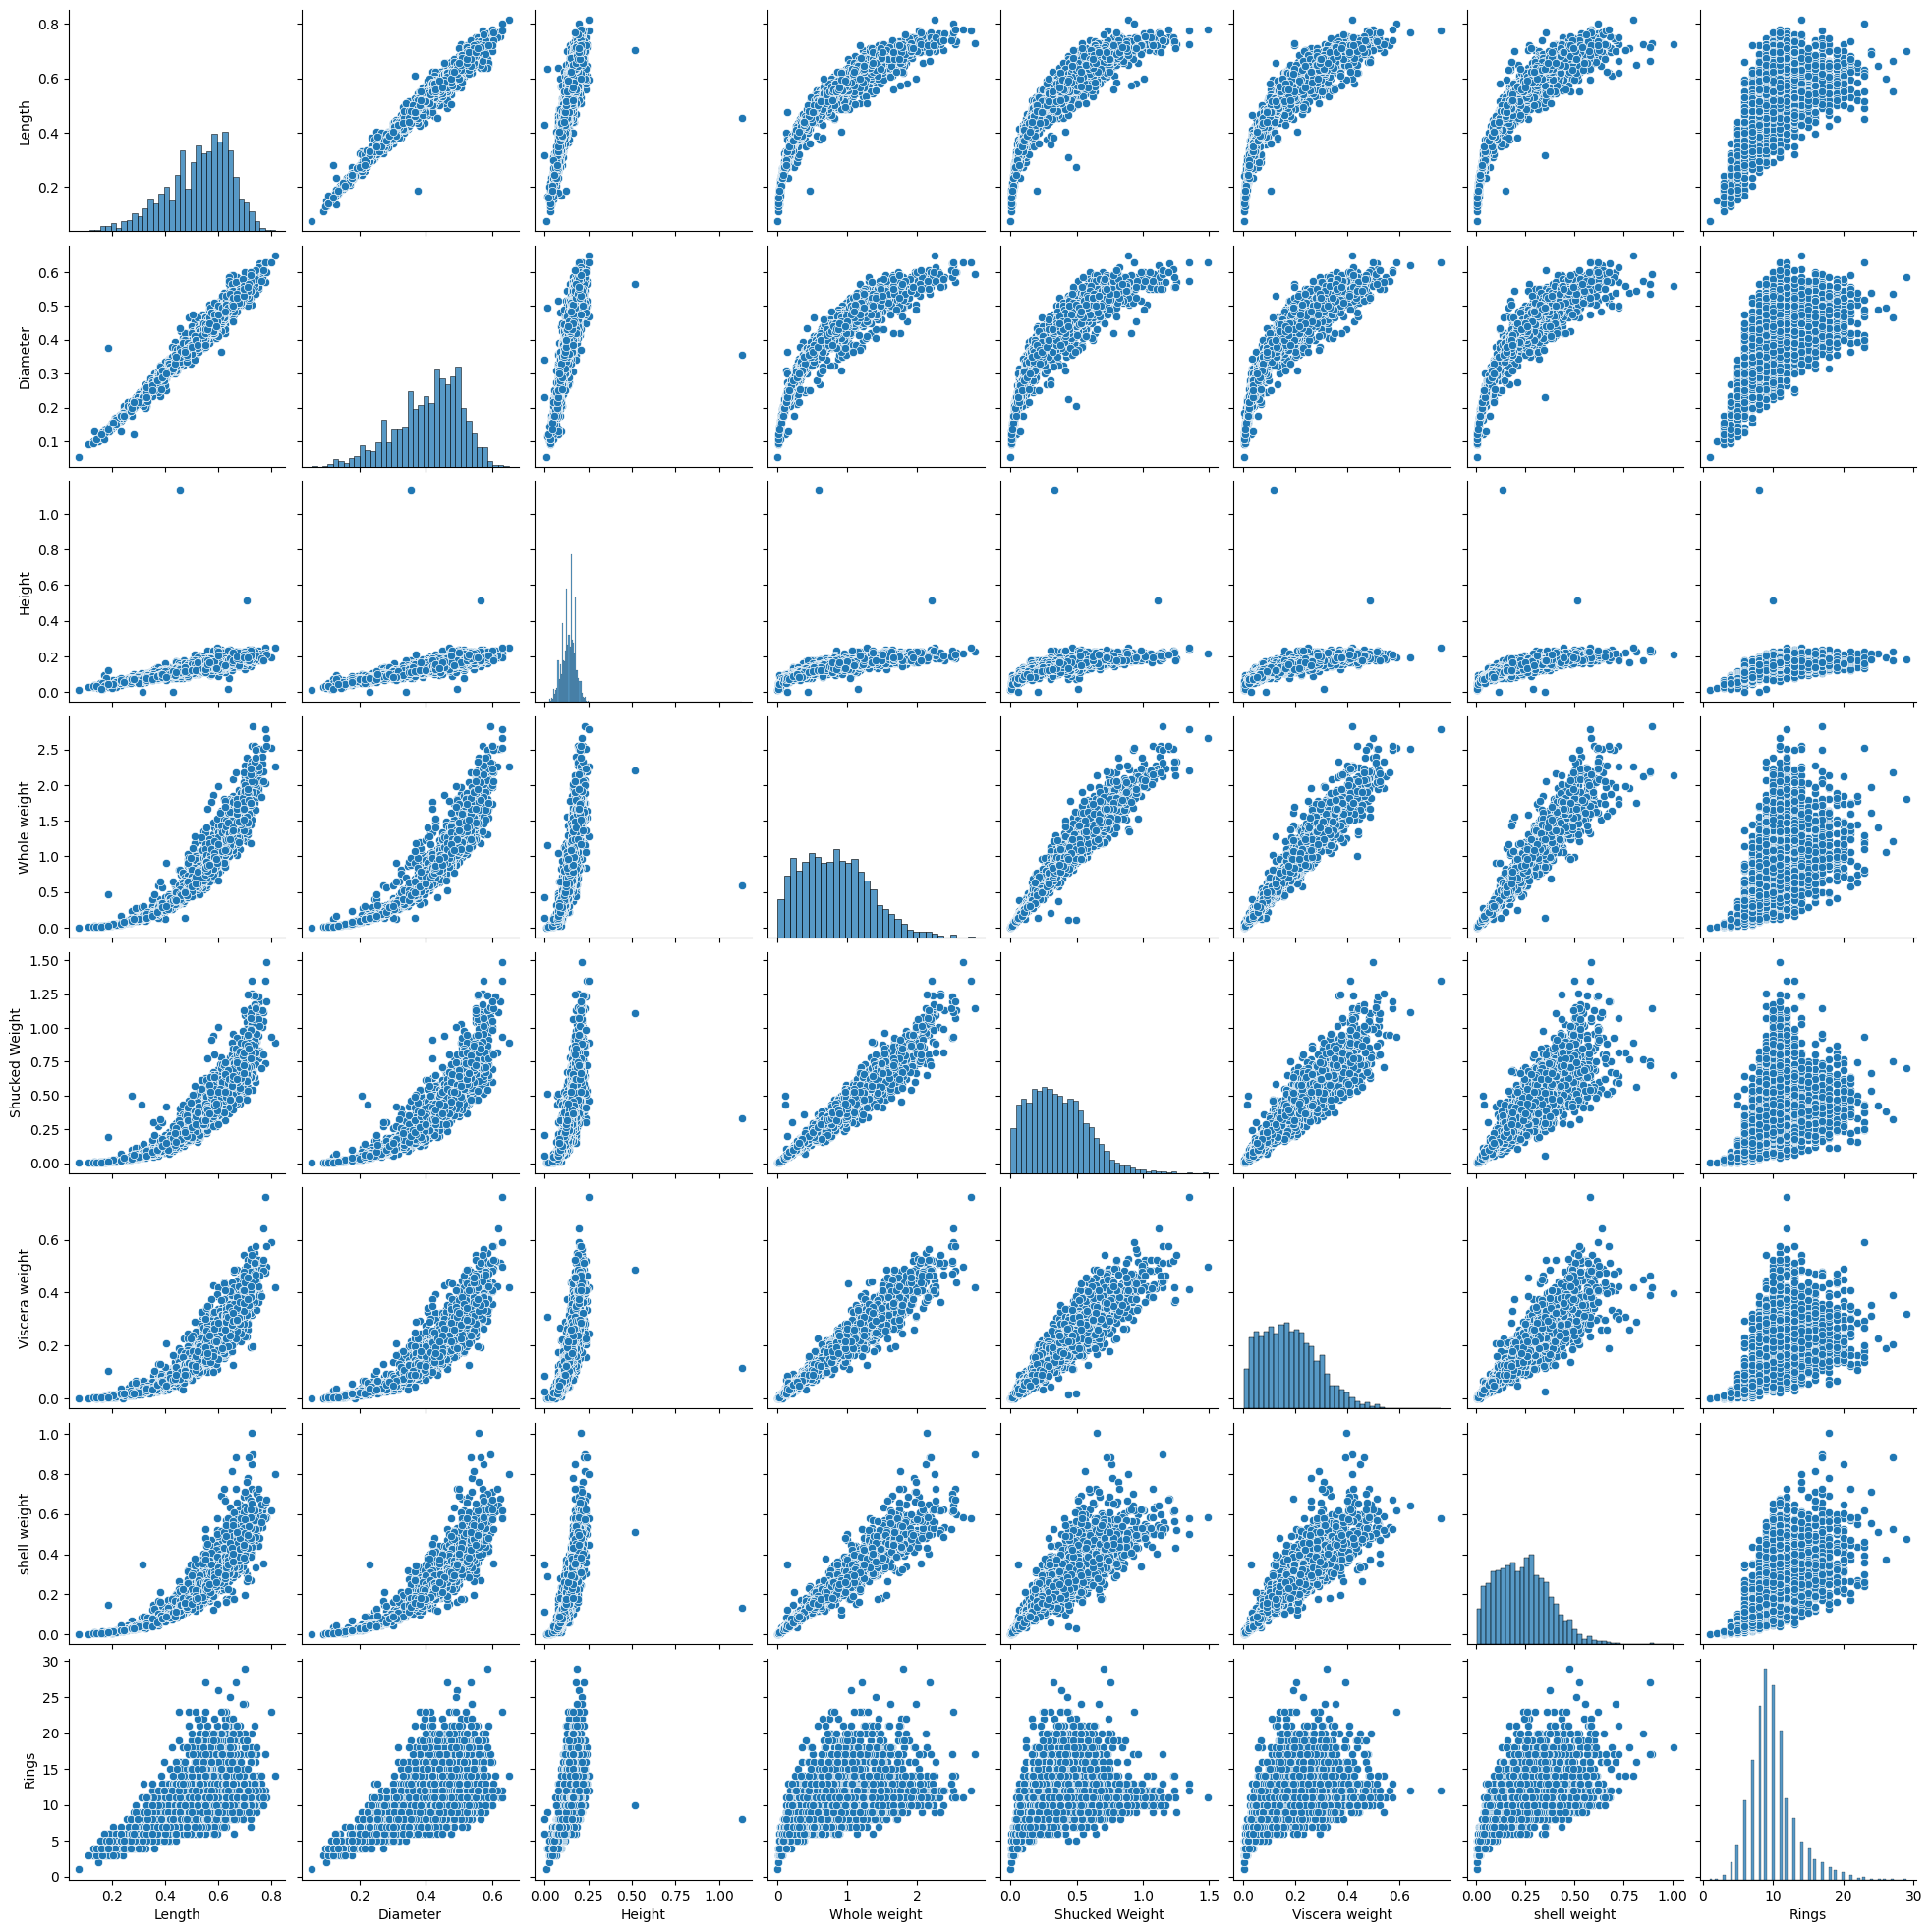

In [ ]:
plt.figure()
sns.pairplot(abalone_data, diag_kind='hist');


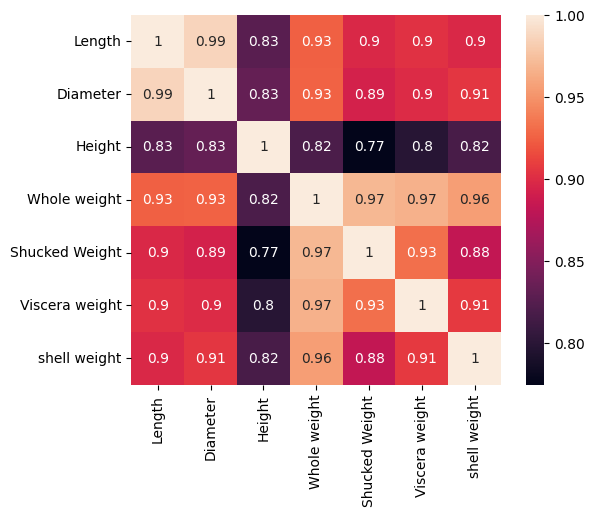

In [ ]:
plt.figure()
sns.heatmap(abalone_data.iloc[:, 1:-1].corr(), annot=True, square=True)
plt.show() #Sex sütunu kaldırılarak yapıldı sayısal deger degildi.

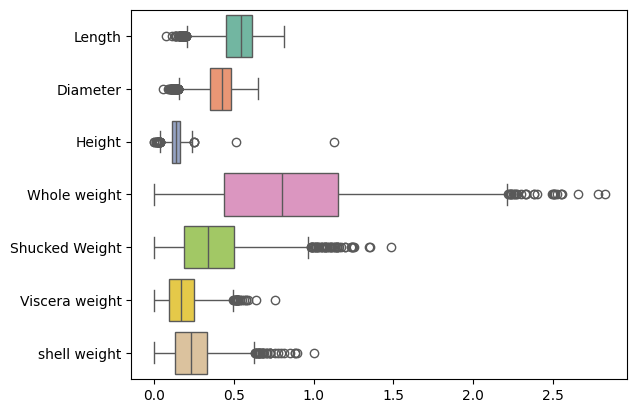

In [ ]:
plt.figure()
sns.boxplot(data=abalone_data.iloc[:, :-1], orient="h", palette="Set2");

In [ ]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# convert age to age group
for ix in abalone_data.index:
    if abalone_data.loc[ix, 'Rings'] <= 8:
        abalone_data.loc[ix, 'Rings'] = 'young'
    elif abalone_data.loc[ix, 'Rings'] >= 11:
        abalone_data.loc[ix, 'Rings'] = 'old'
    else:
        abalone_data.loc[ix, 'Rings'] = 'middle-aged'


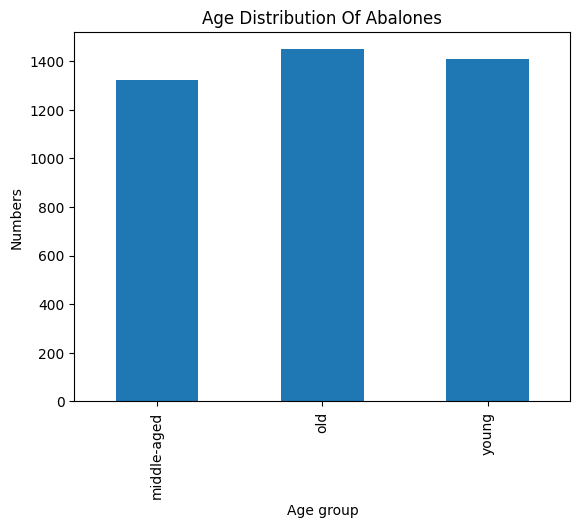

In [ ]:
age_group = abalone_data.groupby('Rings').Rings.count()
ax = age_group.plot(kind='bar')
plt.ylabel('Numbers')
plt.xlabel('Age group')
plt.title('Age Distribution Of Abalones')
plt.show()

In [ ]:
abalone_data['Rings'].unique()


array(['old', 'young', 'middle-aged'], dtype=object)

In [ ]:
abalone_data['Rings'].value_counts().sort_index()

Rings
middle-aged    1323
old            1447
young          1407
Name: count, dtype: int64

In [ ]:
(abalone_data['Height'] == 0).sum()

2

In [ ]:
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,young
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,young


In [ ]:
means = pd.pivot_table(abalone_data, index=['Sex'], aggfunc={'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [ ]:
X = abalone_data.iloc[:,:-1]
y = abalone_data.iloc[:, -1]

In [ ]:
X[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2,
                                                  random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [ ]:
numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked Weight', 'Viscera weight', 'shell weight']
categorical_features = ["Sex"]

In [ ]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=0, strategy="constant", fill_value=0.107996)),
          ("scaler", StandardScaler())])

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ])

In [ ]:
clf = Pipeline(
steps=[("preprocessor", preprocessor),
       ("classifier", DecisionTreeClassifier(max_depth=3, random_state=42))])



In [ ]:
clf.fit(X_train, y_train)
print("Model score: %.3f" % clf.score(X_test, y_test))

Model score: 0.626


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
comparison = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)), 1)

for each in comparison:
    print(each)

['old' 'old']
['old' 'young']
['middle-aged' 'old']
['young' 'young']
['old' 'old']
['old' 'old']
['young' 'young']
['old' 'young']
['young' 'young']
['old' 'middle-aged']
['young' 'young']
['young' 'young']
['young' 'old']
['old' 'middle-aged']
['young' 'young']
['middle-aged' 'young']
['young' 'young']
['old' 'old']
['old' 'young']
['young' 'young']
['young' 'young']
['young' 'young']
['young' 'young']
['young' 'middle-aged']
['old' 'middle-aged']
['old' 'middle-aged']
['young' 'young']
['old' 'old']
['old' 'middle-aged']
['old' 'old']
['young' 'young']
['young' 'young']
['old' 'middle-aged']
['old' 'old']
['young' 'young']
['old' 'young']
['young' 'young']
['middle-aged' 'middle-aged']
['young' 'young']
['old' 'old']
['old' 'old']
['old' 'old']
['old' 'old']
['old' 'old']
['old' 'old']
['young' 'old']
['middle-aged' 'young']
['old' 'middle-aged']
['old' 'old']
['young' 'young']
['old' 'old']
['young' 'young']
['young' 'old']
['old' 'old']
['old' 'old']
['young' 'young']
['young' 'yo

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix \n', cm)

Confusion matrix 
 [[ 50 150  34]
 [ 21 253  21]
 [ 11  76 220]]


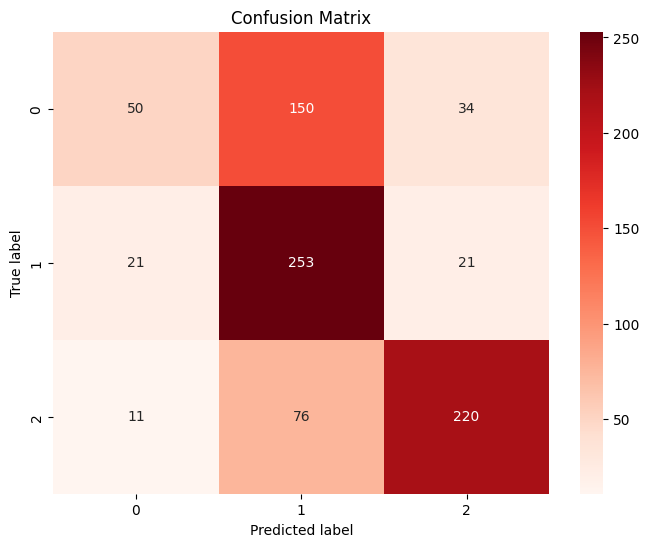

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



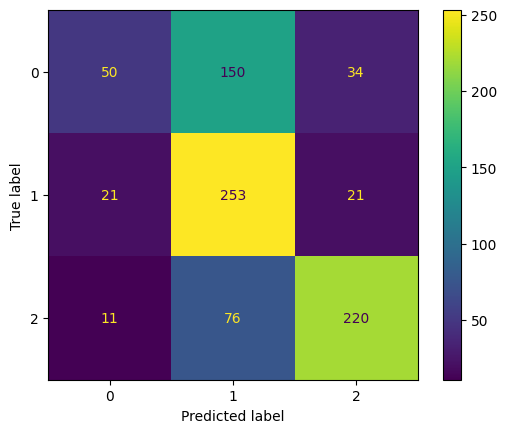

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_predicted = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_predicted)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.plot('Confusion matrix');


In [ ]:
from sklearn.metrics import classification_report

CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

 middle-aged       0.61      0.21      0.32       234
         old       0.53      0.86      0.65       295
       young       0.80      0.72      0.76       307

    accuracy                           0.63       836
   macro avg       0.65      0.60      0.58       836
weighted avg       0.65      0.63      0.60       836



In [ ]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
print(type(acc))
print('Accuracy of each fold ', list(acc*100))
print('Accuracy: {:.2f} %'.format(acc.mean()*100))

<class 'numpy.ndarray'>
Accuracy of each fold  [60.298507462686565, 57.18562874251497, 57.784431137724546, 57.48502994011976, 59.2814371257485, 55.98802395209581, 58.38323353293413, 61.07784431137725, 61.07784431137725, 57.784431137724546]
Accuracy: 58.63 %


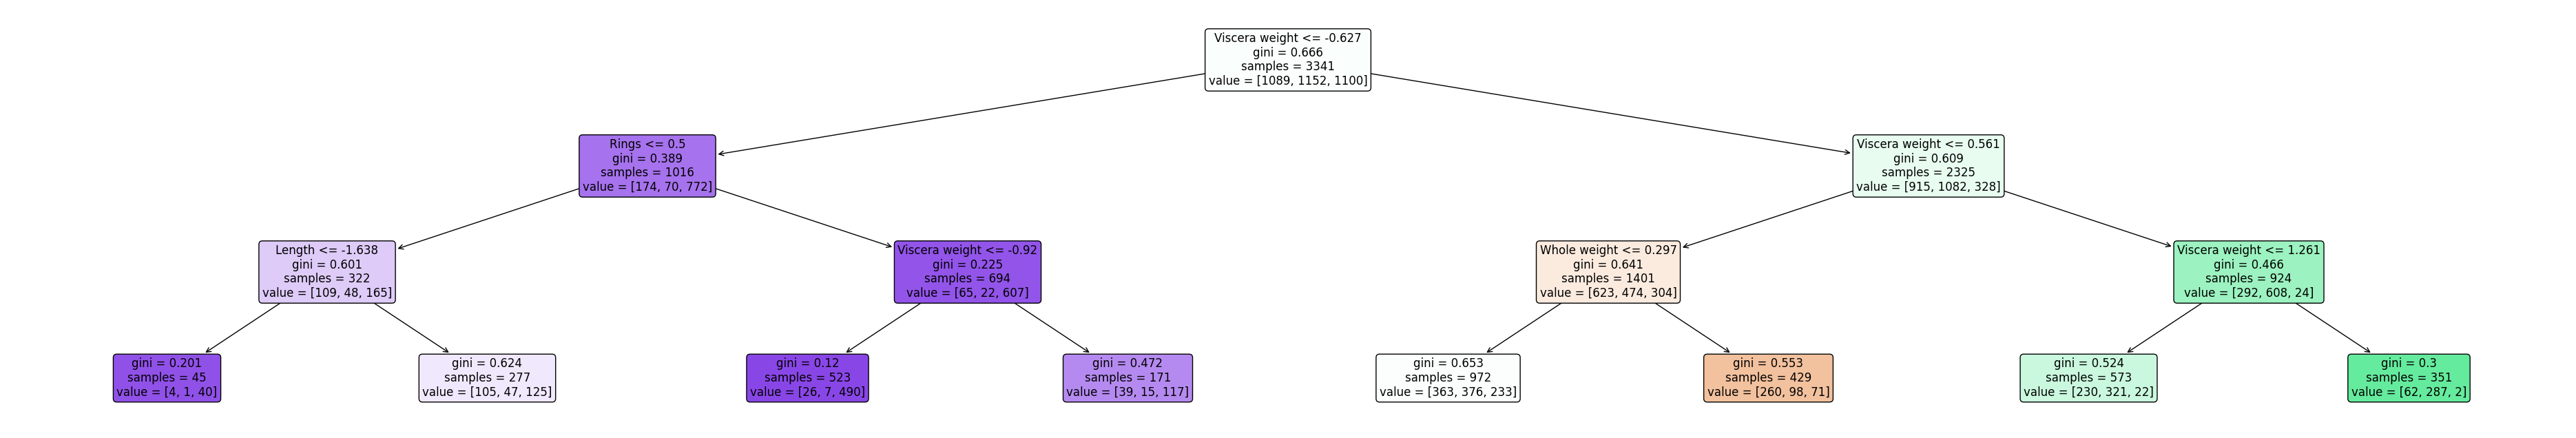

In [ ]:
from sklearn import tree

# plt the figure, setting a black background
plt.figure(figsize=(48, 8), facecolor='w')

# create the tree plot
a = tree.plot_tree(clf['classifier'],
                  # use the feature names stored
                   feature_names=column_names,
                   rounded = True,
                   filled=True,
                   fontsize=12
                  )
# show the plot
plt.show()

In [ ]:
X_train_new = preprocessor.fit_transform(X_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9],
                     'min_samples_split': [2,4,6,8,10]}]
scores=['recall']
for score in scores:
    print()
    print(f"Tuning hyperparameters for {score}")
    print()

    clf_CV = GridSearchCV(DecisionTreeClassifier(),
                         tuned_parameters,
                         scoring=f'{score}_macro')

    clf_CV.fit(X_train_new, y_train)

    print("Best parameters:")
    print()
    print(clf_CV.best_params_)
    print()
    print("Grid scores:")
    means = clf_CV.cv_results_["mean_test_score"]
    stds = clf_CV.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf_CV.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters:

{'max_depth': 7, 'min_samples_split': 6}

Grid scores:
0.549 (+/-0.019) for {'max_depth': 1, 'min_samples_split': 2}
0.549 (+/-0.019) for {'max_depth': 1, 'min_samples_split': 4}
0.549 (+/-0.019) for {'max_depth': 1, 'min_samples_split': 6}
0.549 (+/-0.019) for {'max_depth': 1, 'min_samples_split': 8}
0.549 (+/-0.019) for {'max_depth': 1, 'min_samples_split': 10}
0.584 (+/-0.021) for {'max_depth': 2, 'min_samples_split': 2}
0.584 (+/-0.021) for {'max_depth': 2, 'min_samples_split': 4}
0.584 (+/-0.021) for {'max_depth': 2, 'min_samples_split': 6}
0.584 (+/-0.021) for {'max_depth': 2, 'min_samples_split': 8}
0.584 (+/-0.021) for {'max_depth': 2, 'min_samples_split': 10}
0.590 (+/-0.028) for {'max_depth': 3, 'min_samples_split': 2}
0.590 (+/-0.028) for {'max_depth': 3, 'min_samples_split': 4}
0.590 (+/-0.028) for {'max_depth': 3, 'min_samples_split': 6}
0.590 (+/-0.028) for {'max_depth': 3, 'min_samples_split': 8}
0.590 (+/-0.028) for 

In [ ]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf2 = Pipeline(
steps=[("preprocessor", preprocessor),
       ("classifier", DecisionTreeClassifier(
       max_depth=5, min_samples_split=4, random_state=42))])

In [ ]:
clf2.fit(X_train, y_train)
print("model score: %.3f" % clf2.score(X_test, y_test
                                      ))

model score: 0.635
